## Задание

Распознайте рукописную цифру, написанную на листе от руки.
Последовательность шагов следующая:

*   На бумаге рисуем произвольную цифру (желательно нарисовать цифру размером не
более 5 * 5 мм и без наклона. В занятии нейронка обучалась на цифрах американских студентов. Эти цифры были написаны на тетрадных листах в клетку и имели схожий размер).
*   Фотографируем. Загружаем фото в Collaboratory.
*   С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
*   С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
*   Выполняем инверсию цветов, нормирование и решейп массива.
*   Выполняем распознавание собственной рукописной цифры.

Примечание: точность распознавания рукописных цифр может быть достаточно низкой, т.к. рукописные цифры после преобразований хоть и похожи на содержащиеся в базе, но могут отличаться по конфигурации, толщине линий и т.д.


In [226]:
# Отрисовка изображений в ячейках ноутбука
%matplotlib inline

In [227]:
# Отрисовка изображений
import matplotlib.pyplot as plt
# Работа с массивами
import numpy as np
# Библиотека для загрузки изображений из внешних источников
import requests

# Модуль для работы с байтовыми данными
from io import BytesIO
# Библиотека для работы с изображениями
from PIL import Image
# Утилиты для подготовки данных
from tensorflow.keras import utils
# Библиотека с базой рукописных цифр
from tensorflow.keras.datasets import mnist
# Подключение класса Dense - полносвязный слой
from tensorflow.keras.layers import Dense
# Подключение класса создания модели Sequential
from tensorflow.keras.models import Sequential
# Подключение библиотеки для обработки изображений
from tensorflow.keras.preprocessing import image

In [228]:
# Загрузка из облака данных Mnist
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

In [229]:
# Вывод формы данных для обучения
x_train_org.shape

(60000, 28, 28)

In [230]:
# Изменение формы входных картинок с 28х28 на 784
# первая ось остается без изменения, остальные складываются в вектор
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Проверка результата
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')
print(f'Форма  тестовых данных: {x_test_org.shape} -> {x_test.shape}')

Форма обучающих данных: (60000, 28, 28) -> (60000, 784)
Форма  тестовых данных: (10000, 28, 28) -> (10000, 784)


In [231]:
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

In [232]:
# Задание константы количества распознаваемых классов

CLASS_COUNT = 10

In [233]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

In [234]:
# Вывод формы y_train
# 60 тысяч примеров, каждый длины 10 по числу классов
print(y_train.shape)

(60000, 10)


In [235]:
# Вывод формы массива меток
print(y_train_org.shape)

(60000,)


In [236]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(300, input_dim=784, activation='relu'))
# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(100, activation='relu'))
# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))

In [237]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 300)               235500    
                                                                 
 dense_40 (Dense)            (None, 100)               30100     
                                                                 
 dense_41 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [238]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.2646 - accuracy: 0.9245 - val_loss: 0.1319 - val_accuracy: 0.9603
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1015 - accuracy: 0.9696 - val_loss: 0.0911 - val_accuracy: 0.9715
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0661 - accuracy: 0.9796 - val_loss: 0.0927 - val_accuracy: 0.9716
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0472 - accuracy: 0.9854 - val_loss: 0.0740 - val_accuracy: 0.9775
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0362 - accuracy: 0.9883 - val_loss: 0.0688 - val_accuracy: 0.9787
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0287 - accuracy: 0.9905 - val_loss: 0.0664 - val_accuracy: 0.9794
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0216 - accuracy: 0.9930 - val_loss: 0.0736 - val_accuracy: 0.9778
Epoch 

In [239]:
model.save_weights('model.h5')
model.load_weights('model.h5')

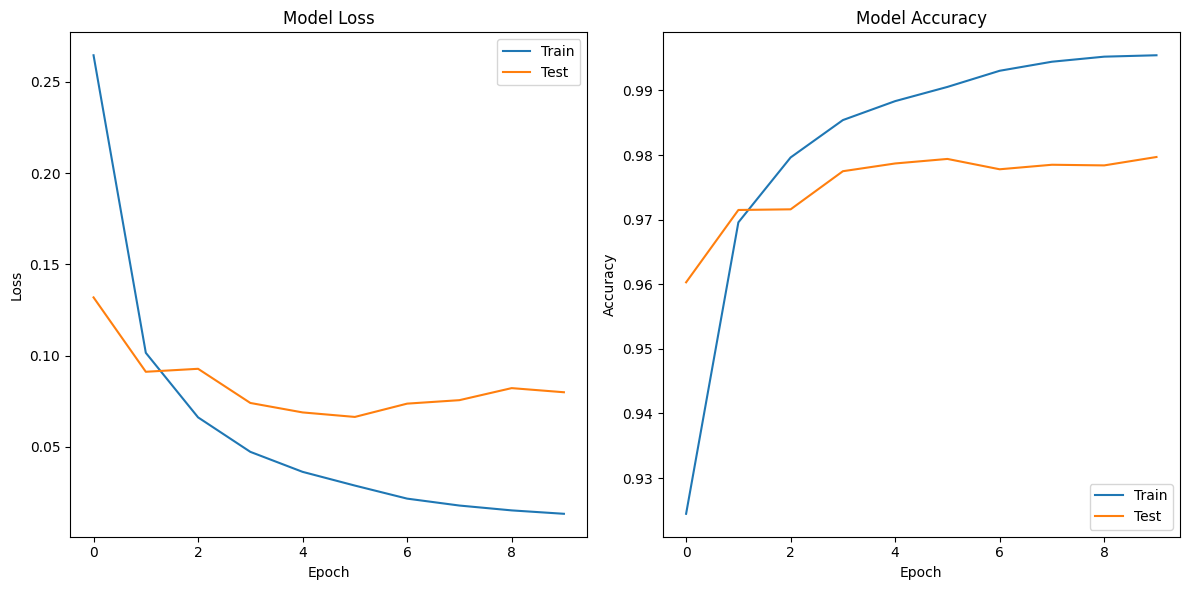

In [240]:
# Создание графика с двумя подграфиками в одной строке
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График ошибки на обучающем и валидационном наборах данных
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Model Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend(['Train', 'Test'], loc='upper right')

# График точности на обучающем и валидационном наборах данных
axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(['Train', 'Test'], loc='lower right')

plt.tight_layout()
plt.show()

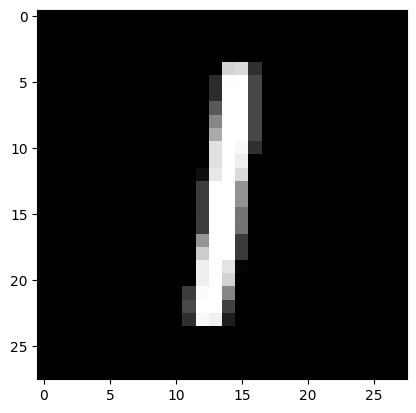

In [241]:
# Установка начального значения для генератора случайных чисел
np.random.seed(42)

# Номер тестовой цифры, которую будем распознавать
n_rec = np.random.randint(x_test_org.shape[0])

# Отображение картинки из тестового набора под номером n_rec
plt.imshow(x_test_org[n_rec], cmap='gray')
plt.show()

In [242]:
# Выбор нужной картинки из тестовой выборки
x = x_test[n_rec]

# Проверка формы данных
print(x.shape)

(784,)


In [243]:
# Добавление одной оси в начале, чтобы нейронка могла распознать пример
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(1, 784)


In [244]:
# Распознавание примера
prediction = model.predict(x)

1/1 [==============================] - 0s 50ms/step


In [245]:
# Вывод результата - вектор из 10 чисел
print(prediction)

[[9.6098964e-13 9.9999976e-01 1.6362596e-10 3.0781391e-10 2.2036200e-08
  2.0155707e-12 1.8514854e-10 2.2675454e-07 3.0796954e-10 9.7440549e-14]]


In [246]:
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')

Распознана цифра: 1


In [247]:
# URL изображения
url = "https://drive.google.com/uc?id=1l3SyEr2IzoIrUblsiO7J8p-Oc_QqjTGb"

# Скачать изображение
response = requests.get(url)

# Открываем изображение из байтового потока
img = Image.open(BytesIO(response.content))

# Сохраняем изображение локально
img_path = '/content/image.jpg'
img.save(img_path)

# Загрузка изображения с помощью Keras
loaded_img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')


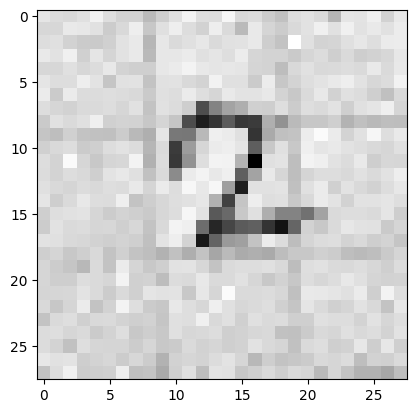

In [248]:
plt.imshow(loaded_img, cmap='gray')

# Вывод n-й картинки
plt.show()

In [249]:
loaded_img_array = image.img_to_array(loaded_img)

print("Размер массива numpy:", loaded_img_array.shape)

Размер массива numpy: (28, 28, 1)


In [250]:
# Инвертируем цвета
inverted_img_array = 255 - loaded_img_array

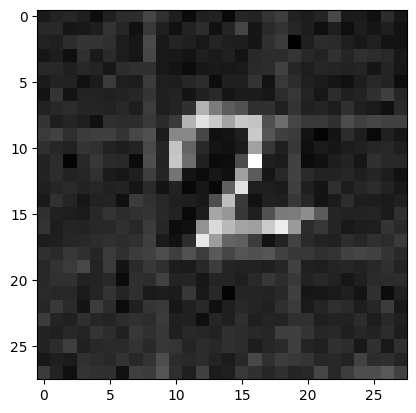

In [251]:
plt.imshow(inverted_img_array, cmap='gray')

# Вывод n-й картинки
plt.show()

In [252]:
print("Размер массива numpy после преобразования:", inverted_img_array.shape)

Размер массива numpy после преобразования: (28, 28, 1)


In [253]:
# Изменяем форму массива на одномерный массив
reshaped_img_array = inverted_img_array.reshape((1, 784))

print("Размер массива numpy после преобразования:", reshaped_img_array.shape)

Размер массива numpy после преобразования: (1, 784)


In [254]:
normalized_img_array = reshaped_img_array.astype('float32') / 255.

In [255]:
my_prediction = model.predict(normalized_img_array)
my_pred = np.argmax(my_prediction)

1/1 [==============================] - 0s 20ms/step


In [261]:
print(f'Распознана цифра: {my_pred}')

Распознана цифра: 2
